# Hjorts parameters and detectivity
Hjorts parameters ar eoften used for detecting signs in EMG signals and for detecting and classifying`textures`


#### Hjorth Activity
The activity parameter represents the signal power, the variance of a time function. <br>
This can indicate the surface of power spectrum in the frequency domain. This is represented by the following equation:

\begin{align}
Activity  =  \text{var}(y(t))
\end{align}

Where ''y(t)'' represents the signal.

Varians
 - Work out the Mean (the simple average of the numbers)
 - Then for each number: subtract the Mean and square the result (the squared difference).
 - Then work out the average of those squared differences. 

#### Hjorth Mobility
The mobility parameter represents the mean frequency or the proportion of standard deviation of the power spectrum. This is defined as the square root of variance of the first derivative of the signal **y(t)** divided by variance of the signal **y(t).**

\begin{align}
Mobility =\sqrt\frac{{\text{var}(\frac{dy(t)}{dt})}}{\text{var}(y(t))}.
\end{align}

### Hjorth Complexity
The Complexity parameter represents the change in frequency. The parameter compares the signal's similarity to a pure [[sine wave]], where the value converges to 1 if the signal is more similar.

\begin{align}
Complexity =\frac{{\text{Mobility}(\frac{dy(t)}{dt})}}{\text{Mobility}(y(t))}.
\end{align}


In [1]:
# from https://www.kaggle.com/ivanzadorozniy/bearing-feature-extraction
import numpy as np
import pandas as pd
#import scipy.stats as sp
#from math import log, e
#from scipy.signal import butter, sosfilt

'''
Hjorts’ parameters are calculated based on the first and the second derivatives of the vibration signal. 
In the time series context, the numerical values for the derivatives are obtained as the differences between the current value and the prior value. 
There are three parameters: activity, mobility, complexity. 
These parameters have been used in electroencephalography (EEG) signals to detect the epileptic seizures. 
They have never been used in vibration bearing signal except for activity feature, which is similar to the variance feature in the statistical time-domain features extraction.
'''
def mob(sig):
    first_dif = sig.diff()
    var = (sig.std())**2
    var_first_dif = (first_dif.std())**2
    
    mob = np.sqrt(var_first_dif / var)
    
    return mob

def get_hjorts_parameters_test(signal):
    # get signal and first derivate
    signal = pd.Series(signal)
    signal_dif = signal.diff()
    
    # signal activity is just var and is equal to std^2
    std = signal.std()
    activity = std**2
    
    #get signals mobility
    mobility = mob(signal)
    
    # get derived signals mobility, used for complexity
    mobility_diff = mob(signal_dif)
    
    # complexity is the relation between mobility of the derived signal vs the time signal
    complexity = mobility_diff / mobility
    
    return [activity, mobility, complexity]


def get_hjorts_parameters_w(signal):
    signal = pd.Series(signal)
    first_diff = signal.diff()
    first_diff_std = first_diff.std()
    if(first_diff_std == 0.0):
        return[0,0,0]
    second_diff = signal.diff().diff()
    std = signal.std()
    
    #var = std^2
    activity_hjorts_parameters = std**2
    act_fd = first_diff.std()**2 
    
    mobility_hjorts_parameters = np.sqrt(  act_fd /  activity_hjorts_parameters )
    
    ##
    activity_hjorts_parameters = std**2
    act_fd = first_diff.std()**2 
    mobility_hjorts_parameters_d = np.sqrt(  act_fd /  activity_hjorts_parameters )
    
    #mobility_hjorts_parameters = first_diff.std()/std
    #complexity_hjorts_parameters = (second_diff.std()/first_diff_std )/ (first_diff_std / std)
    complexity_hjorts_parameters = (second_diff.std()/first_diff_std )/ mobility_hjorts_parameters

    #return activity_hjorts_parameters
    return [activity_hjorts_parameters, mobility_hjorts_parameters, complexity_hjorts_parameters]

def get_hjorts_parameters(signal):
    signal = pd.Series(signal)
    first_diff = signal.diff()
    first_diff_std = first_diff.std()
    
    if(first_diff_std == 0.0):
        return[0,0,0]
    second_diff = signal.diff().diff()
    std = signal.std()
    
    activity_hjorts_parameters = std**2
    mobility_hjorts_parameters = first_diff.std()/std
    complexity_hjorts_parameters = (second_diff.std()/first_diff_std )/ (first_diff_std / std)
    #return activity_hjorts_parameters
    return [activity_hjorts_parameters, mobility_hjorts_parameters, complexity_hjorts_parameters]

In [2]:
def db(sig,ref=1.0):
    res = 10*np.log10(sig/ref)
    return res


def get_hjorts_parameters_detectivity(signal):
    signal = pd.Series(signal)
    first_diff = signal.diff()
    first_diff_std = first_diff.std()
    
    if(first_diff_std == 0.0):
        return[0,0,0,0]
    second_diff = signal.diff().diff()
    std = signal.std()
    
    activity_hjorts_parameters = std**2
    mobility_hjorts_parameters = first_diff.std()/std
    complexity_hjorts_parameters = (second_diff.std()/first_diff_std )/ (first_diff_std / std)
    #return activity_hjorts_parameters
    
    detectivity = db(activity_hjorts_parameters) - db(100*mobility_hjorts_parameters) + db(complexity_hjorts_parameters)
    
    return [activity_hjorts_parameters, mobility_hjorts_parameters, complexity_hjorts_parameters, detectivity]

In [6]:
def hjorts2(a):
    first_deriv = np.diff(a)
    second_deriv = np.diff(a,2)

    var_zero = np.mean(a ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)

    activity = var_zero
    morbidity = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / morbidity

    return activity, morbidity, complexity

hh = hjorts2(x_b)
bb

In [63]:
dx_b = np.diff(x_b)
len(dx_b)

20479

In [64]:
len(x_b)


20480

In [65]:
x_b[0:5]

array([0.        , 0.00920375, 0.01840673, 0.02760815, 0.03680722])

In [66]:
dx_b[0:5]

array([0.00920375, 0.00920298, 0.00920142, 0.00919908, 0.00919596])

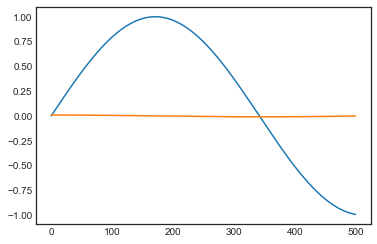

In [72]:
plt.plot(x_b[0:500])
plt.plot(dx_b[0:500])



In [8]:
len(x_a)

NameError: name 'x_a' is not defined

## Hjorts parameters on various signals
When applying hjorts parameters on various signals we expect following

![.](img/hp_sig.png)

In [ ]:
rate

20480

In [9]:
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Set the parameters
rate = 20480
duration = 1.0
# Calculate the signal
dt = 1/rate
t = np.arange(0, duration, dt)

x_a = np.ones(len(t))
x_b = 1* np.sin(2*np.pi * 30 * t)
x_c = 10* np.sin(2*np.pi * 30 * t)
x_d = 1* np.sin(2*np.pi * 15 * t)
x_e = np.concatenate((np.zeros(shape=int(len(t)/2)),np.ones(shape=int(len(t)/2))))
f1 = np.zeros(len(t)) 
f1[int(len(t)/2)]=1
x_f = f1
x_g = np.random.randn(len(t))
x_h = np.exp(-5.0 * t) * x_b
x_i = np.exp(-5.0 * t) * x_g
x_j = x_b + x_h
x_k = x_g + x_h
x_l = x_b + x_i

In [19]:
print(np.mean(x_b))
print(np.var(x_b))

4.163336342344337e-18
0.5


In [46]:
import os
def save_as_ints(floatNums, name, path='data/int/'):
    a = 10_000 * floatNums
    b = a.astype(int)
    print(len(b))
    isExist = os.path.exists(path)
    if not isExist:    
        os.makedirs(path)
    np.savetxt(f'{path}{name}',b,fmt = '%d,')
    return b

def save_as_floats(floatNums, name, path='data/float/'):
    isExist = os.path.exists(path)
    if not isExist:    
        os.makedirs(path)
    np.savetxt(f'{path}{name}',floatNums,fmt = '%f,')



In [49]:
a

array([10000, 10000, 10000, ..., 10000, 10000, 10000])

In [55]:
b = save_as_ints(x_b,'x_b')
c = save_as_ints(x_c,'x_c')
g = save_as_ints(x_g,'x_g')

20480
20480
20480


In [47]:
sig_names = ["x_a","x_b","x_c","x_d","x_e","x_f","x_g","x_h","x_i","x_j","x_k","x_l"]
signals = [x_a,x_b,x_c,x_d,x_e,x_f,x_g,x_h,x_i,x_j,x_k,x_l]

for s,n in zip(signals,sig_names):
    save_as_ints(s,n)

20480
20480
20480
20480
20480
20480
20480
20480
20480
20480
20480
20480


In [43]:
sig_names = ["x_a","x_b","x_c","x_d","x_e","x_f","x_g","x_h","x_i","x_j","x_k","x_l"]
signals = [x_a,x_b,x_c,x_d,x_e,x_f,x_g,x_h,x_i,x_j,x_k,x_l]

for s,n in zip(signals,sig_names):
    save_as_floats(s,n)

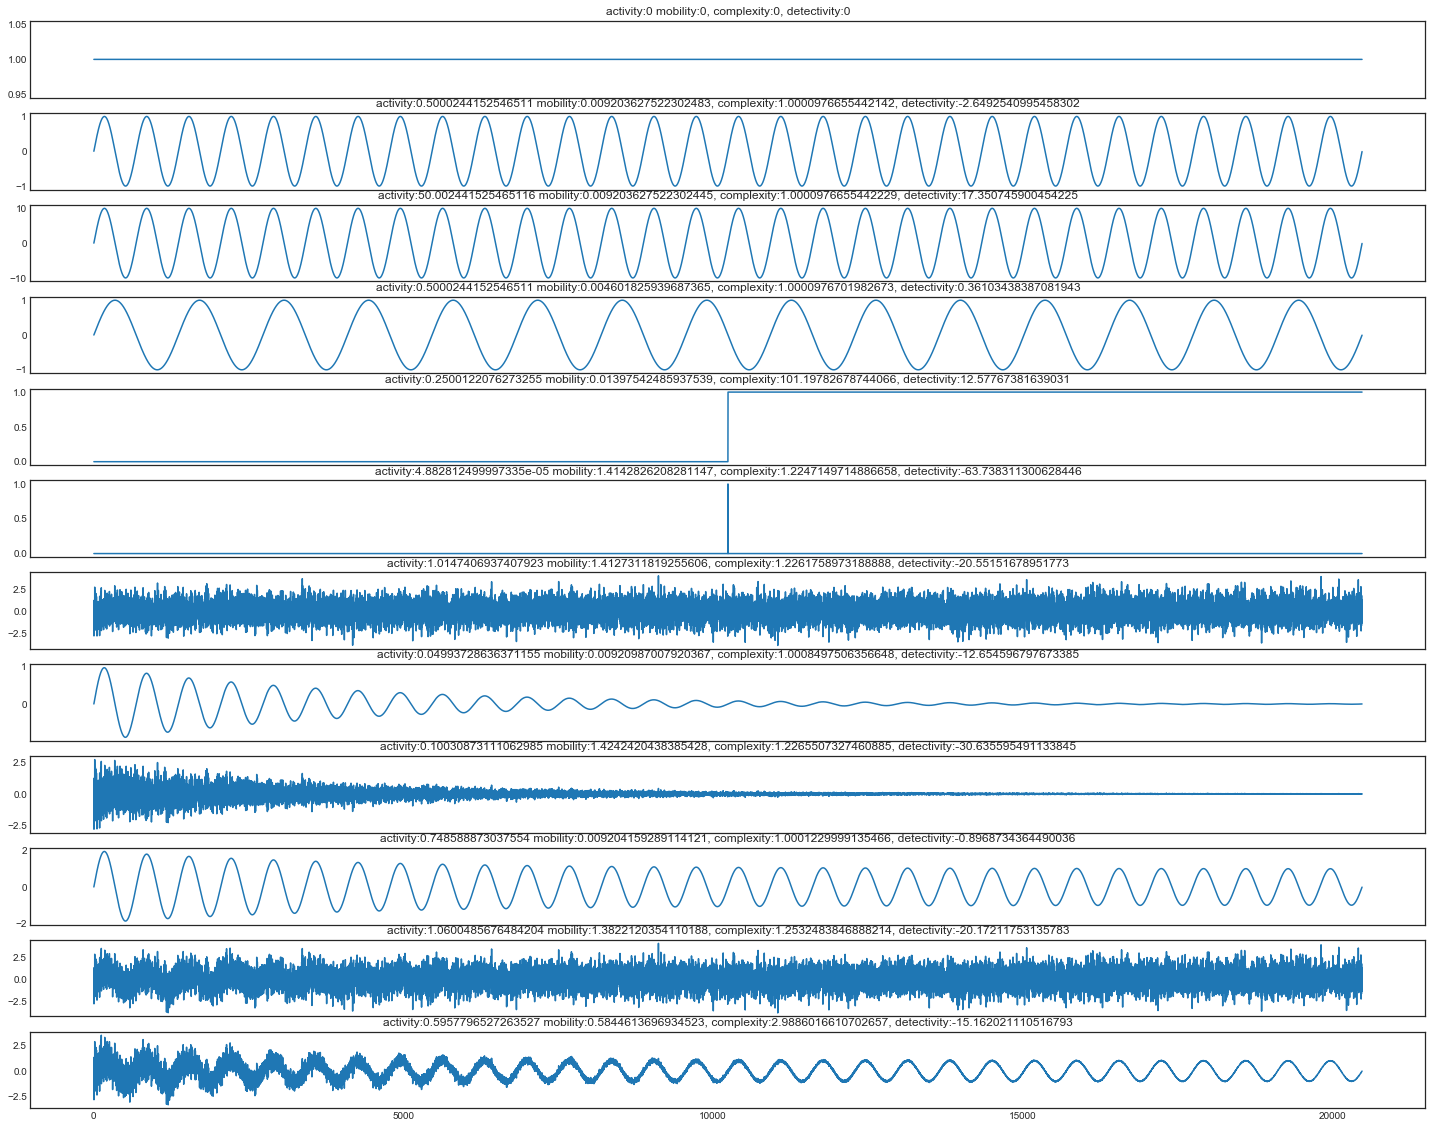

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

signals = [x_a,x_b,x_c,x_d,x_e,x_f,x_g,x_h,x_i,x_j,x_k,x_l]
len(signals)

feat = []
fig, ax = plt.subplots(12, 1, sharex='col', sharey='row',figsize=(25,20))
for j in range(len(signals)):
        ax[j].plot(signals[j])
        activity, mobility, complexity, detectivity = get_hjorts_parameters_detectivity(signals[j])
        ax[j].set_title(f'activity:{activity} mobility:{mobility}, complexity:{complexity}, detectivity:{detectivity}')
        feat.append([activity, mobility, complexity,detectivity])

/Users/opprud/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


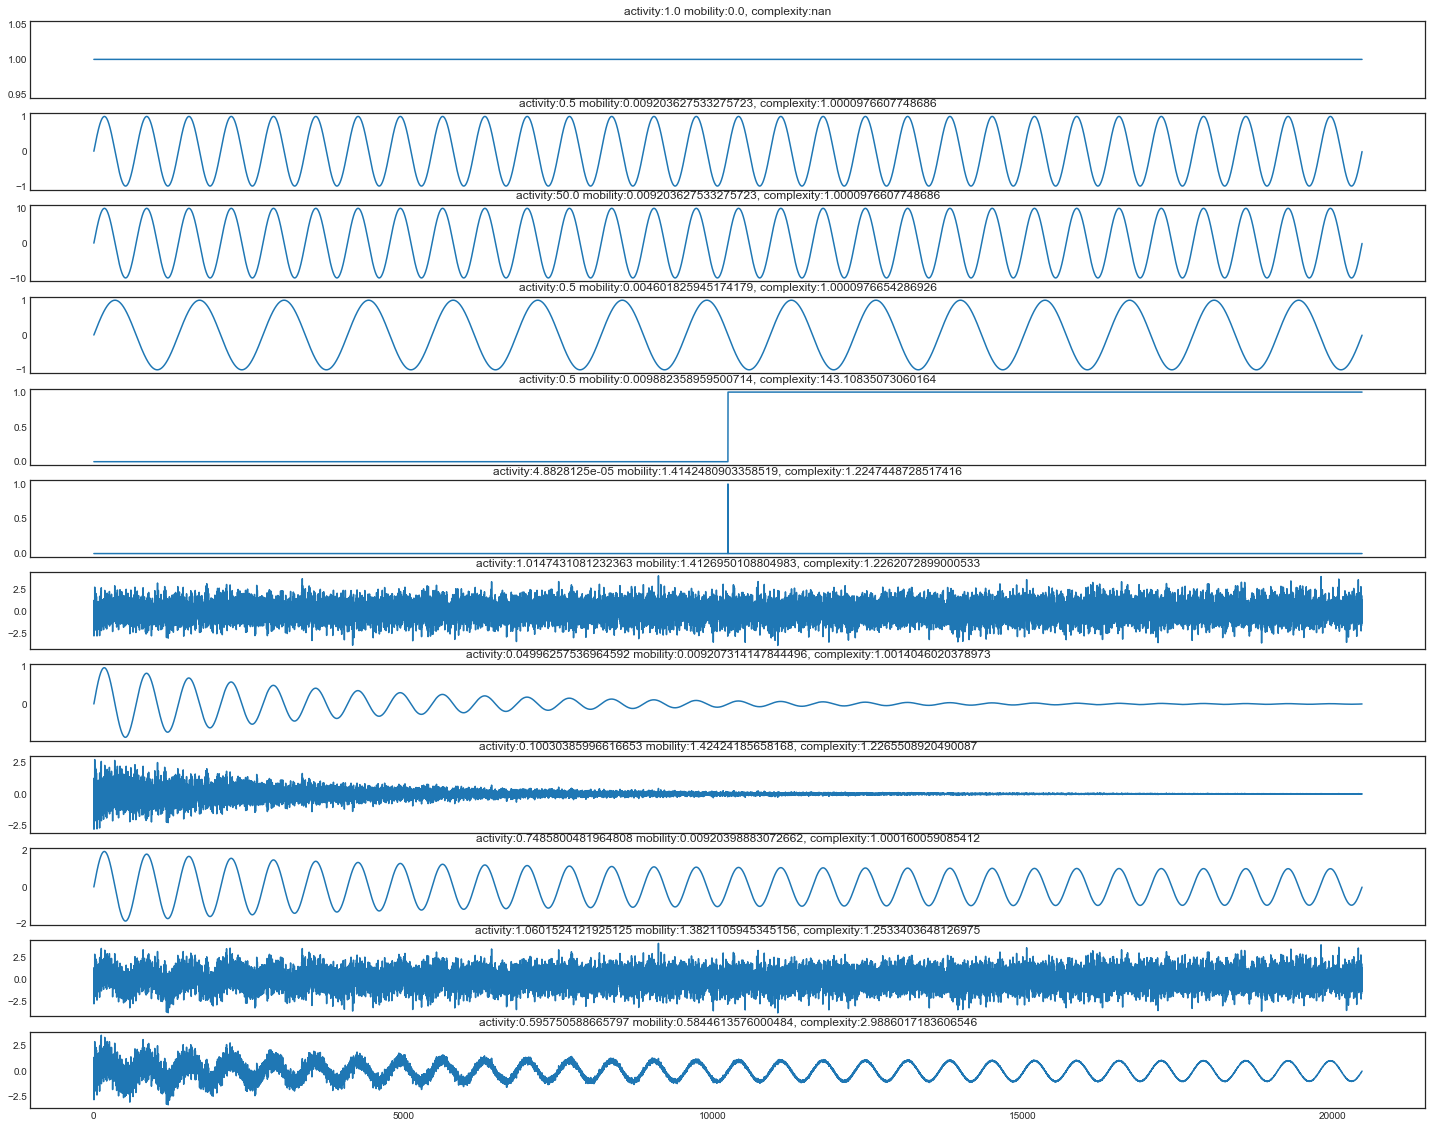

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

signals = [x_a,x_b,x_c,x_d,x_e,x_f,x_g,x_h,x_i,x_j,x_k,x_l]
len(signals)

feat = []
fig, ax = plt.subplots(12, 1, sharex='col', sharey='row',figsize=(25,20))
for j in range(len(signals)):
        ax[j].plot(signals[j])
        activity, mobility, complexity = hjorts2(signals[j])
        ax[j].set_title(f'activity:{activity} mobility:{mobility}, complexity:{complexity}')
        feat.append([activity, mobility, complexity,detectivity])

In [57]:
print(np.var(x_b))
print(np.var(x_c))
print(np.var(x_g))

0.5
50.0
1.0146911458553565


In [60]:
10_000 * 10_000

100000000

In [61]:
div = 100_000_000
print(np.var(b)/div)
print(np.var(c)/div)
print(np.var(g)/div)

0.499937501171875
49.999373781386716
1.0146106667430952


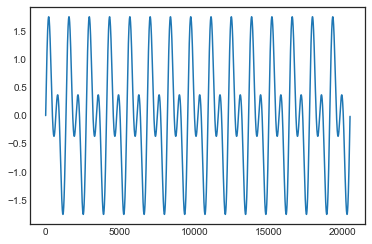

In [16]:
plt.plot(x_b+x_d)

In [17]:
''' calculate envelope using hilbert transform on input a'''
def hilbert(a):
    '''
    a: input signal
    '''
    N = len(a)
    h = 1.0/N * np.ones(N)
    A = np.fft.fft(a, n=N)
    A *= h
    a = np.fft.ifft(A)
    a = a.real
    return a    


In [18]:
h

NameError: name 'h' is not defined

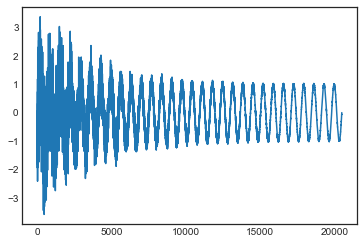

In [ ]:
plt.plot(x_l)

In [ ]:
import scipy.signal as sig

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


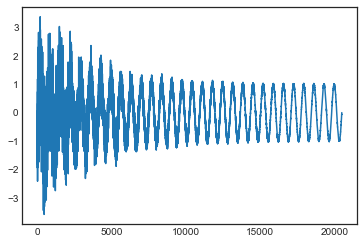

In [ ]:
x_lh2 = sig.hilbert(x_l)
plt.plot(x_lh2)

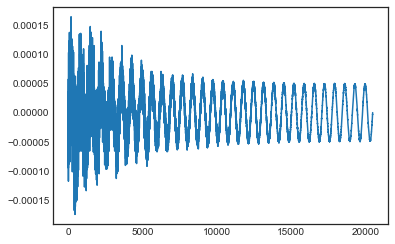

In [ ]:
x_lh = hilbert(x_l)
plt.plot(x_lh)

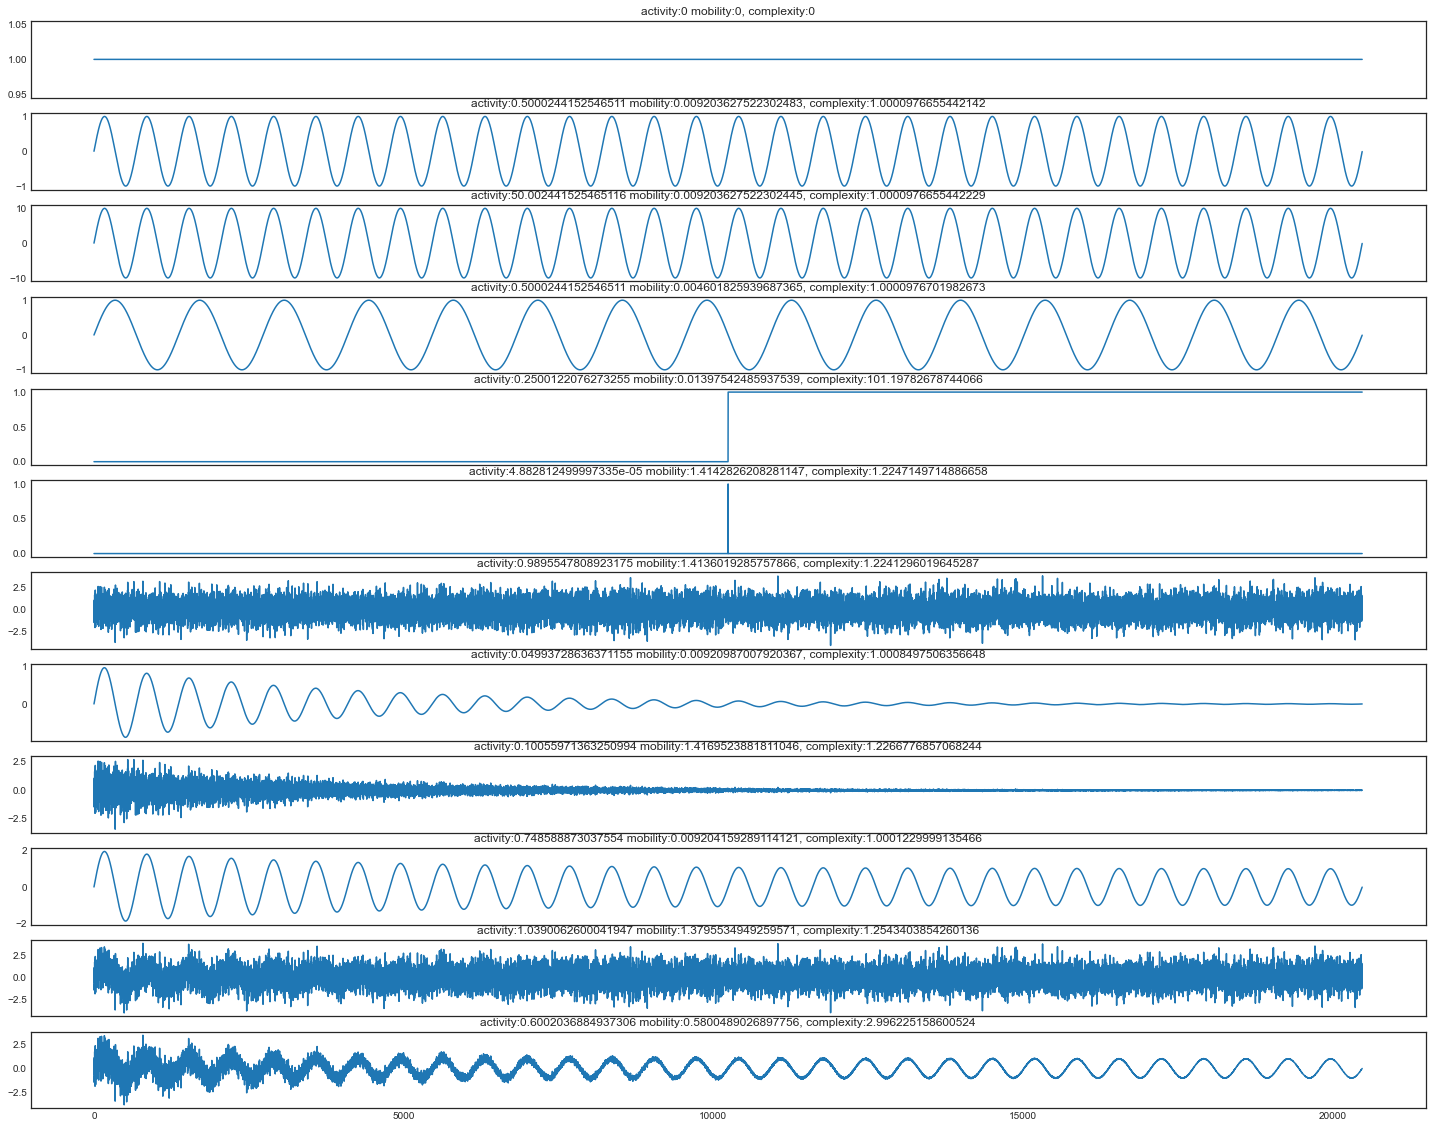

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

signals = [x_a,x_b,x_c,x_d,x_e,x_f,x_g,x_h,x_i,x_j,x_k,x_l]
len(signals)

feat = []
fig, ax = plt.subplots(12, 1, sharex='col', sharey='row',figsize=(25,20))
for j in range(len(signals)):
        ax[j].plot(signals[j])
        activity, mobility, complexity = get_hjorts_parameters(signals[j])
        ax[j].set_title(f'activity:{activity} mobility:{mobility}, complexity:{complexity}')
        feat.append([activity, mobility, complexity])

In [ ]:
feat

[[0, 0, 0],
 [0.5000244152546511, 0.009203627522302483, 1.0000976655442142],
 [50.002441525465116, 0.009203627522302445, 1.0000976655442229],
 [0.5000244152546511, 0.004601825939687365, 1.0000976701982673],
 [0.2500122076273255, 0.01397542485937539, 101.19782678744066],
 [4.882812499997335e-05, 1.4142826208281147, 1.2247149714886658],
 [1.0019273246819795, 1.4076685800316024, 1.2271186227340076],
 [0.04993728636371155, 0.00920987007920367, 1.0008497506356648],
 [0.10121297161153457, 1.4300055241477936, 1.2149455776003462],
 [0.748588873037554, 0.009204159289114121, 1.0001229999135466],
 [1.055068260002063, 1.3717621057146645, 1.2592373868158555],
 [0.6044461811317365, 0.5852241909067134, 2.968431183985846]]

In [ ]:
def db(sig,ref=1.0):
    res = 10*np.log10(sig/ref)
    return res

In [ ]:
db(0.013,ref=8.0)

-27.891466346851068

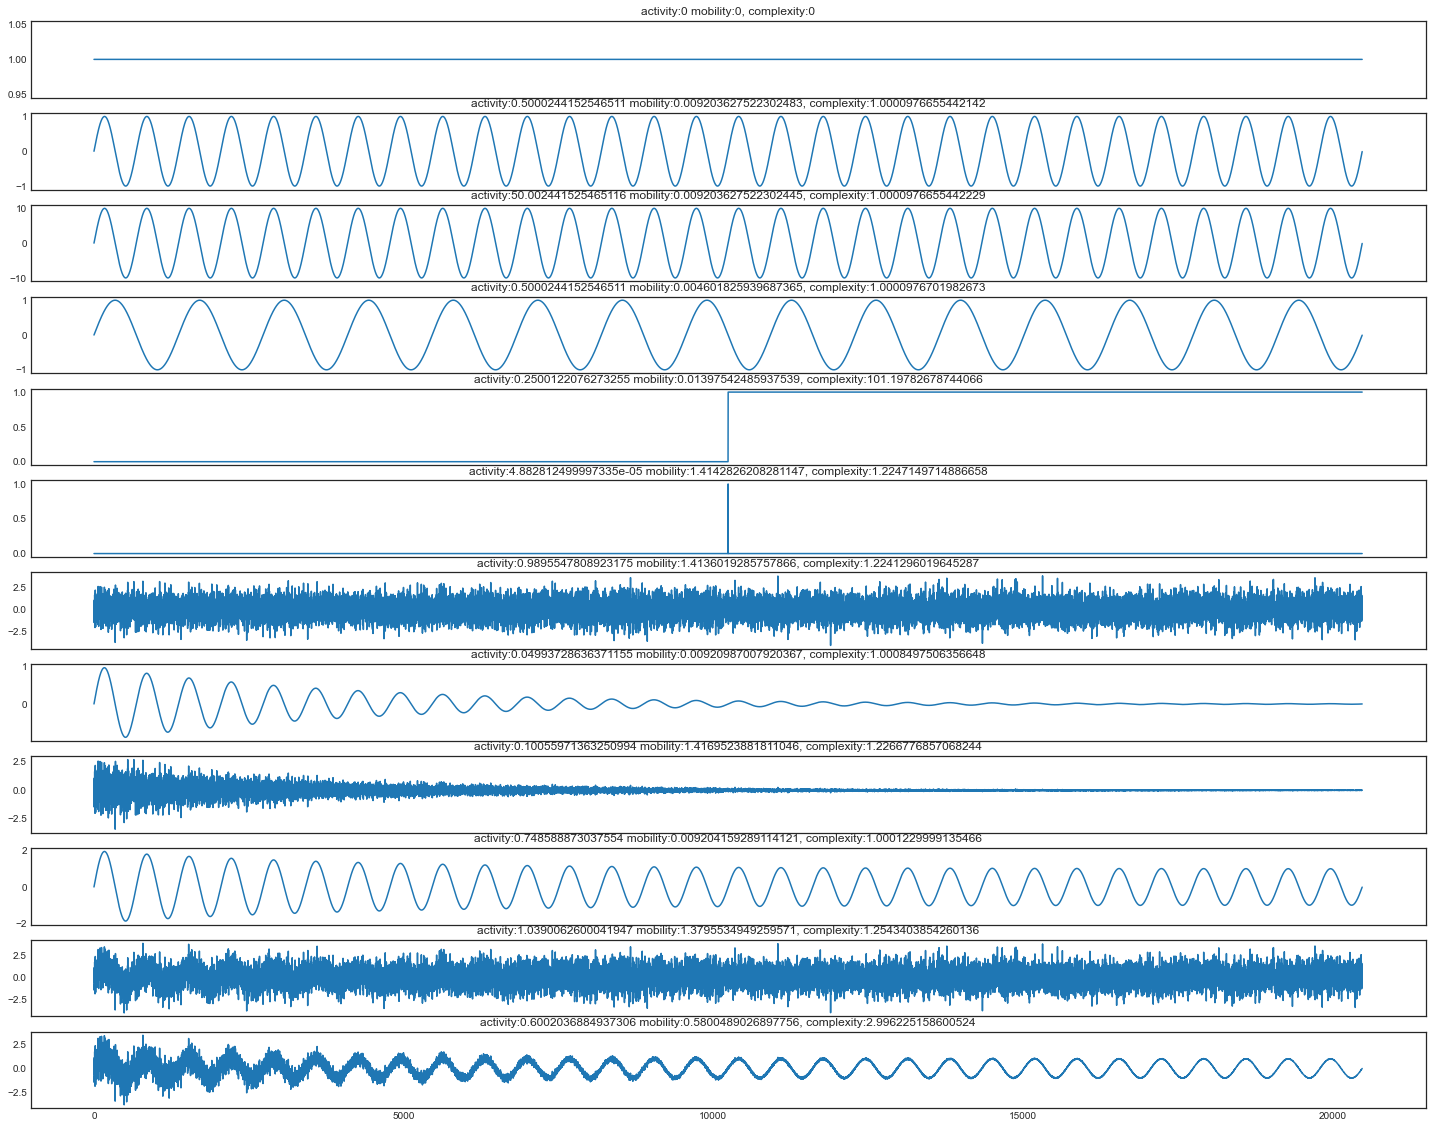

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig, ax = plt.subplots(12, 1, sharex='col', sharey='row',figsize=(25,20))
for j in range(len(signals)):
        ax[j].plot(signals[j])
        activity, mobility, complexity = get_hjorts_parameters(signals[j])
        ax[j].set_title(f'activity:{activity} mobility:{mobility}, complexity:{complexity}')

In [ ]:
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Set the parameters
freqs = np.c_[[2, 30, 400]]
amps = np.r_[0.5, 1, 0.1]
rate = 20480
duration = 1.0

# Note that we want the "freq" as an numpy array, so we can normalize it afterwards
bandpass = {'freq': np.r_[10, 100],
            'order': 3}

# Calculate the signal
dt = 1/rate
t = np.arange(0, duration, dt)
t = np.atleast_2d(t)
nyq = rate/2   # Nyquist frequency
x = amps @ np.sin(2*np.pi * freqs @ t)   #If you don't believe it, do it explicitly


In [ ]:
np.shape(x)

(10240,)

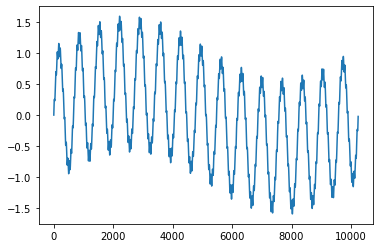

In [ ]:
plt.plot(x)

## Detectivity: a new parameter
As proved in the previous section, each Hjorth’s parameter gives pieces of information about the status of bearings but a combination of them is not straightforward, since the parameters have different units, order of magnitudes and behaviour during the evolution of the condition of bearings. 

According to Fig. 2b), the following considerations can be developed:
 * **Activity** and Mobility are not adimensional parameters and their values could change significantly. 
 * **Activity** and Complexity increase as the fault severity does. 
 * **Mobility** decreases as the fault severity does.
 
A new parameter - called Detectivity - is proposed to merge Hjorth’s parameters together. The core idea is that the new parameter should span the full life of the component highlighting the deterioration near the end of its lifecycle.

![Detectivity](img/det.png)